In [2]:
import os
import re

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import mplcursors

from bs4 import BeautifulSoup

%matplotlib widget

## GENERATING LIST OF MOVIES BY STUDIO BY YEAR

In [3]:
# Major studios: MGM, RKO, UA, Warner, Universal, Columbia, 20th Century Fox, Paramount, Disney
# Note that the freely available IMDB data-sets don't include studio information, so we're scraping an approximate set from Wikipedia
wiki_urls_type_1 = [
    ("https://en.wikipedia.org/wiki/List_of_RKO_Pictures_films", "RKO"),
    ("https://en.wikipedia.org/wiki/List_of_United_Artists_films", "United Artists"),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1918%E2%80%931929)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1930%E2%80%931939)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1940%E2%80%931949)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1950%E2%80%931959)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1960%E2%80%931969)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1970%E2%80%931979)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1980%E2%80%931989)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(1990%E2%80%931999)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(2000%E2%80%932009)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(2010%E2%80%932019)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Warner_Bros._films_(2020%E2%80%932029)", "Warner Bros."),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(1937%E2%80%931959)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(1960%E2%80%931979)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(1980%E2%80%931989)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(1990%E2%80%931999)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(2000%E2%80%932009)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(2010%E2%80%932019)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Studios_films_(2020%E2%80%932029)", "Walt Disney"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1924%E2%80%931929)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1930%E2%80%931939)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1940%E2%80%931949)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1950%E2%80%931959)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1960%E2%80%931969)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1970%E2%80%931979)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1980%E2%80%931989)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(1990%E2%80%931999)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(2000%E2%80%932009)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(2010%E2%80%932019)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Metro-Goldwyn-Mayer_films_(2020%E2%80%932029)", "MGM"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1922%E2%80%931939)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1940%E2%80%931949)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1950%E2%80%931959)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1960%E2%80%931969)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1970%E2%80%931979)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1980%E2%80%931989)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(1990%E2%80%931999)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(2000%E2%80%932009)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(2010%E2%80%932019)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Columbia_Pictures_films_(2020%E2%80%932029)", "Columbia"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1912%E2%80%931919)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1920%E2%80%931929)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1930%E2%80%931939)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1940%E2%80%931949)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1950%E2%80%931959)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1960%E2%80%931969)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1970%E2%80%931979)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1980%E2%80%931989)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(1990%E2%80%931999)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(2000%E2%80%932009)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(2010%E2%80%932019)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Universal_Pictures_films_(2020%E2%80%932029)", "Universal"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1912%E2%80%931919)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1920%E2%80%931929)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1930%E2%80%931939)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1940%E2%80%931949)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1950%E2%80%931959)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1960%E2%80%931969)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1970%E2%80%931979)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1980%E2%80%931989)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(1990%E2%80%931999)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(2000%E2%80%932009)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(2010%E2%80%932019)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Paramount_Pictures_films_(2020%E2%80%932029)", "Paramount"),
    ("https://en.wikipedia.org/wiki/List_of_Fox_Film_films", "20th Century Fox"),
    ("https://en.wikipedia.org/wiki/List_of_Twentieth_Century_Pictures_films", "20th Century Fox"),
    ("https://en.wikipedia.org/wiki/List_of_20th_Century_Fox_films_(1935%E2%80%931999)", "20th Century Fox"),
    ("https://en.wikipedia.org/wiki/List_of_20th_Century_Fox_films_(2000%E2%80%932020)", "20th Century Fox")
]

# wiki_urls_type_2 = [
#     "https://en.wikipedia.org/wiki/List_of_Vitagraph_Studios_films",
#     "https://en.wikipedia.org/wiki/List_of_Triangle_Film_Corporation_films",
#     "https://en.wikipedia.org/wiki/List_of_Tiffany_Pictures_films",
# ]

In [4]:
def add_films_to_tsv(film_list_url, studio_name, title_first=False, file_name="films_by_studio.tsv"):
    films = []
    bad_row_count = 0
    page = requests.get(film_list_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    ftables = soup.find_all('table', class_=re.compile('wikitable sortable'))
    for table in ftables:
        prev_date = "0"
        rows = table.find_all('tr')
        for row in rows[1:]:
            if title_first:
                ftitle = row.select_one('td:nth-of-type(1)').text
                fdate = row.select_one('td:nth-of-type(2)').text
            else:
                if len(row.select('td')) < 3:
                    first_cell_text = row.select_one('td:nth-of-type(1)').text
                    if re.search("\s(19|20)\d\d$", first_cell_text):
                        fdate = first_cell_text
                        ftitle = row.select_one('td:nth-of-type(2)').text
                    else:
                        fdate = prev_date
                        ftitle = row.select_one('td:nth-of-type(1)').text
                else:
                    fdate = row.select_one('td:nth-of-type(1)').text
                    ftitle = row.select_one('td:nth-of-type(2)').text
                    if fdate.strip() == "TBA":
                        break
                    prev_date = fdate
            year_match = re.search("19\d\d|20\d\d", fdate)
            if year_match:
                films.append(ftitle.strip() + "\t" + year_match.group() + "\t" + studio_name + "\n")
            elif film_list_url.find("Walt_Disney_Studios") > -1:
                year_match = re.search("19\d\d|20\d\d", prev_date)
                if year_match:
                    films.append(ftitle.strip() + "\t" + year_match.group() + "\t" + studio_name + "\n")
            else:
                print("Bad row:", row, "@", film_list_url, "\n")
                bad_row_count += 1
    with open(file_name, "a") as tsv:
        tsv.writelines(films)
    return bad_row_count

with open("films_by_studio.tsv", "w") as f:
    f.write("title\tyear\tstudio\n")
brc = 0
for (url, studio) in wiki_urls_type_1:
    brc += add_films_to_tsv(url, studio)
print("\nTOTAL BAD ROWS:", brc)


TOTAL BAD ROWS: 0


In [5]:
df = pd.read_csv("films_by_studio.tsv", sep="\t")
print(df.shape)
df.loc[df.isnull().any(axis=1), :]

(22470, 3)


,title,year,studio


In [6]:
dupes = df.loc[df.duplicated(subset=['title','year'],keep=False)].sort_values(['year','title'])
print(dupes.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dupes.head())

# Export the dupes as a TSV file, so duplicate entries can be manually pruned
# dupes.to_csv('duplicate_films_by_studio.csv', sep="\t")

(774, 3)


,title,year,studio
15550,Carmen,1915,Paramount
19088,Carmen,1915,20th Century Fox
1129,Sally of the Sawdust,1925,United Artists
16550,Sally of the Sawdust,1925,Paramount
9114,Fashion Madness,1928,Columbia


In [7]:
# Import the pruned duplicates file back as a df, and use a merge to remove duplicate entries from the df
dupes = pd.read_csv("duplicate_films_by_studio.tsv", sep="\t")
df = pd.merge(df, dupes, on=["title", "year", "studio"], how="outer", indicator=True)
df = df.loc[df["_merge"] == "left_only"].drop("_merge", axis=1)
df.to_csv("films_by_studio.tsv", sep="\t")
df.shape

(22347, 3)

In [8]:
# Verifying title integrity
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
mdf = df.loc[df['title'].apply(lambda x: any([m in x for m in months]))]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mdf)

,title,year,studio
234,Enchanted April,1935,RKO
576,The Mayor of 44th Street,1942,RKO
2134,Four Days in November,1964,United Artists
2309,That Splendid November,1971,United Artists
2555,Until September,1984,United Artists
2648,Pieces of April,2003,United Artists
3033,Maybe It's Love,1930,Warner Bros.
3193,The Mayor of Hell,1933,Warner Bros.
3274,Maybe It's Love,1935,Warner Bros.
3518,Torchy Runs for Mayor,1939,Warner Bros.


## Grouping Movies by Year+Studio

In [9]:
gdf = df.groupby(['year','studio']).size().unstack()
gdf.fillna(0, inplace=True)
display(gdf)

studio,20th Century Fox,Columbia,MGM,Paramount,RKO,United Artists,Universal,Walt Disney,Warner Bros.
year,,,,,,,,,
1912,0.0,0.0,0.0,2.0,0.0,0.0,7.0,0.0,0.0
1913,0.0,0.0,0.0,13.0,0.0,0.0,8.0,0.0,0.0
1914,8.0,0.0,0.0,66.0,0.0,0.0,14.0,0.0,0.0
1915,36.0,0.0,0.0,108.0,0.0,0.0,44.0,0.0,0.0
1916,53.0,0.0,0.0,105.0,0.0,0.0,110.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024,0.0,5.0,0.0,7.0,0.0,0.0,6.0,10.0,5.0
2025,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0
2026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


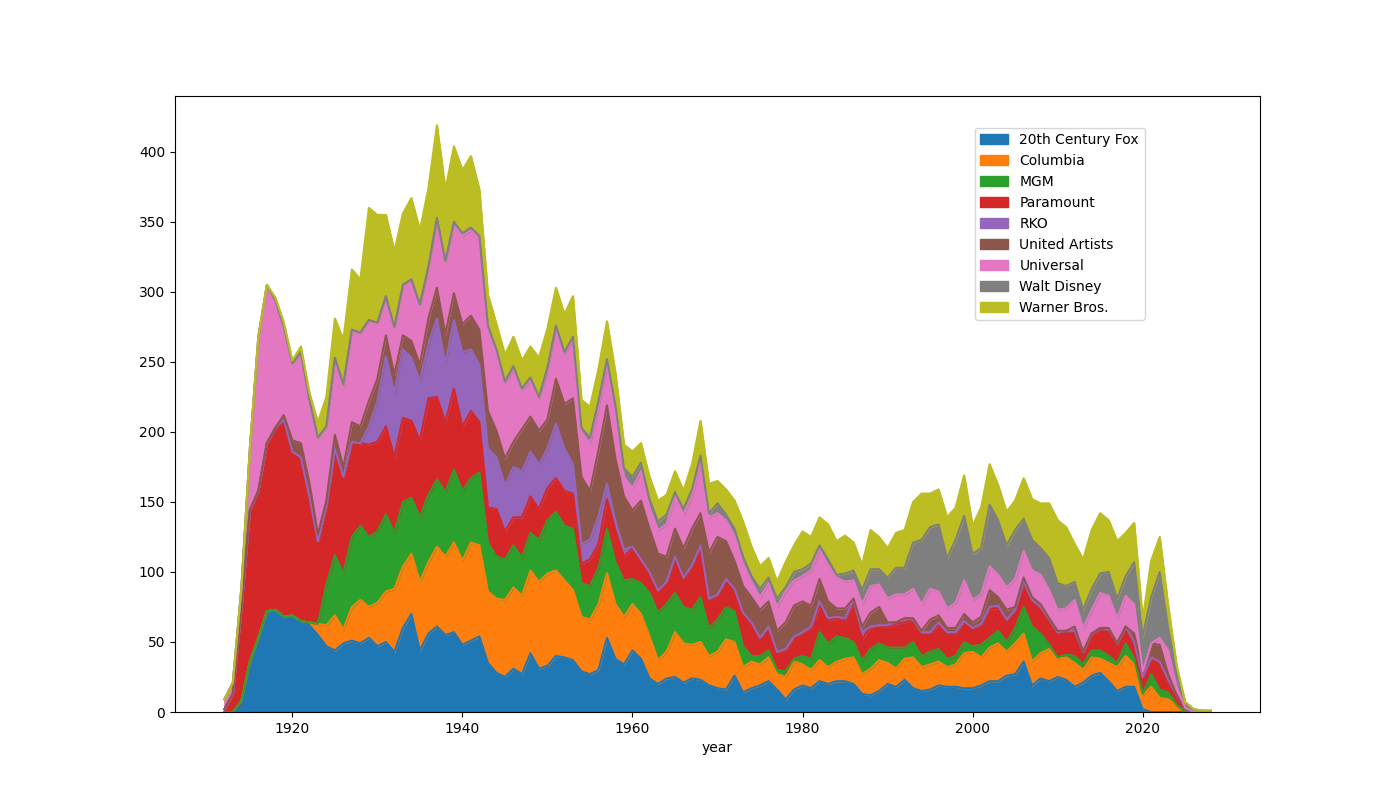

In [11]:
plt.close()
fig, ax = plt.subplots(figsize=(14,8));
gdf.plot.area(stacked=True, ax=ax);
ax.legend(loc="upper right", bbox_to_anchor=(0.9,0.96));

cursor = mplcursors.cursor(ax)
import math
@cursor.connect("add")
def on_add(sel):
    index = math.floor(sel.target.index)
    data_row = gdf.iloc[index]
    val = sel.artist.get_data()[1][index]
    cume = 0
    for studio, numfilms in data_row.items():
        cume += numfilms
        if cume >= val:
            label = str(gdf.index[index]) + "\n"
            label += studio + ": " + str(numfilms)
            sel.annotation.set(text=label)
            break

## OBTAINING and PREPPING IMDB DATA-SET FILES

In [ ]:
%%bash

curl https://datasets.imdbws.com/title.basics.tsv.gz --output "1a - all_media_basics.tsv.gz"
gzip -d "1a - all_media_basics.tsv.gz"

cat "1a - all_media_basics.tsv" | grep -vP "tvEpisode|tvMiniSeries|tvSeries|tvPilot|tvShort|tvSpecial|videoGame" > "1b - film_basics.tsv"
cat "1b - film_basics.tsv" | grep -vP "\t(video|short|tvMovie)\t" > "1c - movie_basics.tsv"

curl https://datasets.imdbws.com/name.basics.tsv.gz --output "2 - principal_names.tsv.gz"
gzip -d "2 - principal_names.tsv.gz"

curl https://datasets.imdbws.com/title.principals.tsv.gz --output "3a - film_principals.tsv.gz"
gzip -d "3a - film_principals.tsv.gz"

# FILTERING DOWN 2.3GB film_principals.tsv FILE

In [12]:
movie_basics = pd.read_csv("1c - movie_basics.tsv", sep="\t")
movie_basics.shape

(625636, 9)

In [ ]:
mp_iter = pd.read_csv("3a - film_principals.tsv", sep="\t", iterator=True, chunksize=5000, usecols=['tconst','nconst','category'])
movie_principals = pd.concat(mp_iter, ignore_index=True)

movie_principals.shape

In [ ]:
mfilt = movie_principals.tconst.isin(movie_basics.tconst)

movie_details = movie_principals[mfilt]
print(movie_details.shape)

movie_details.head()

In [ ]:
movie_details.to_csv("3b - movie_principals.tsv", sep="\t")

# RUNTIME FREQUENCY ANALYSIS

In [14]:
mdata = pd.read_csv("1c - movie_basics.tsv", usecols=['primaryTitle','startYear','runtimeMinutes','genres'], sep="\t")

print("ORIG-SHAPE:", mdata.shape)

to_drop = mdata.loc[mdata.runtimeMinutes == "\\N"]
mdata.drop(index=to_drop.index, inplace=True)
print("UPDATED-SHAPE:", mdata.shape)

ORIG-SHAPE: (625636, 4)
UPDATED-SHAPE: (395003, 4)


In [15]:
to_drop = mdata.loc[mdata.startYear == "\\N"]
mdata.drop(index=to_drop.index, inplace=True)
print("UPDATED-SHAPE:", mdata.shape)

UPDATED-SHAPE: (388953, 4)


In [16]:
mdata.runtimeMinutes = mdata.runtimeMinutes.astype(int)
mdata.startYear = mdata.startYear.astype(int)

In [17]:
runtimes = mdata.runtimeMinutes
too_low = runtimes[runtimes < 10]
print(too_low.shape)
mdata.loc[too_low.index]

(189,)


,primaryTitle,startYear,runtimeMinutes,genres
52513,Stargrove,1974,2,\N
71323,Würfel,1990,2,Animation
71808,Ein Fest,1991,3,\N
73637,Lonely Cowboy in 1992,1992,3,\N
93053,In the Good Old Summer Time,1926,5,"Animation,Music,Short"
...,...,...,...,...
608718,Rubber,2017,7,\N
614400,First Bite,2018,7,\N
614537,The Other Side,2018,6,\N
620896,The Reception,2022,7,"Drama,Horror,Sci-Fi"


In [18]:
too_high = runtimes[runtimes > 300]
print(too_high.shape)
display(mdata.loc[too_high.index].sort_values("runtimeMinutes", ascending=False))
mdata.drop(too_high.index, inplace=True)

(400,)


,primaryTitle,startYear,runtimeMinutes,genres
595093,Logistics,2012,51420,Documentary
483711,Ambiancé,2020,43200,Documentary
278405,Carnets Filmés (Liste Complète),2019,28643,Documentary
446191,Modern Times Forever,2011,14400,Documentary
247146,Qw,2019,10062,Drama
...,...,...,...,...
21068,Dick Tracy's G-Men,1939,302,Mystery
339185,Zindaadil,2020,302,Comedy
535192,Clint Lowery: the Sound and the Story,2014,302,Documentary
178043,"Sobri, ponyvafilm",2002,301,Adventure


Text(0.5, 0, 'Runtime (minutes)')

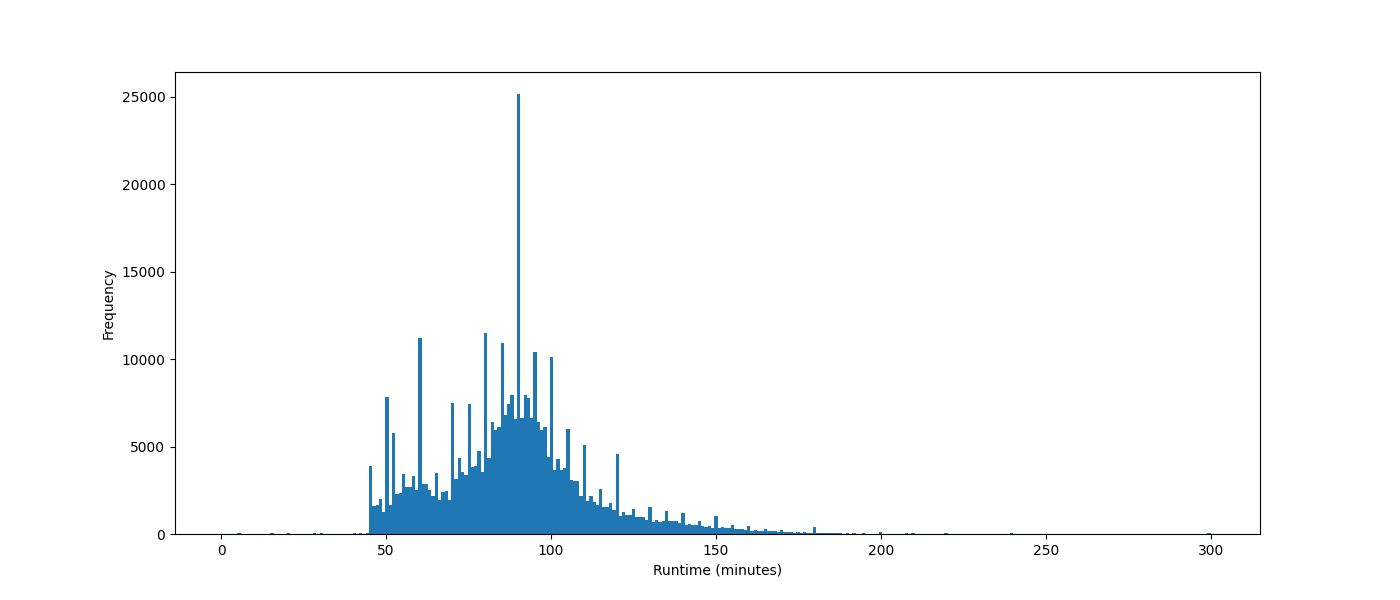

In [19]:
plt.close()
fig2, ax2 = plt.subplots(figsize=(14,6))
mdata.runtimeMinutes.plot.hist(ax=ax2, bins=300)
ax2.set_xlabel("Runtime (minutes)")

interactive(children=(IntSlider(value=1894, description='year', max=2026, min=1894), Output()), _dom_classes=(…

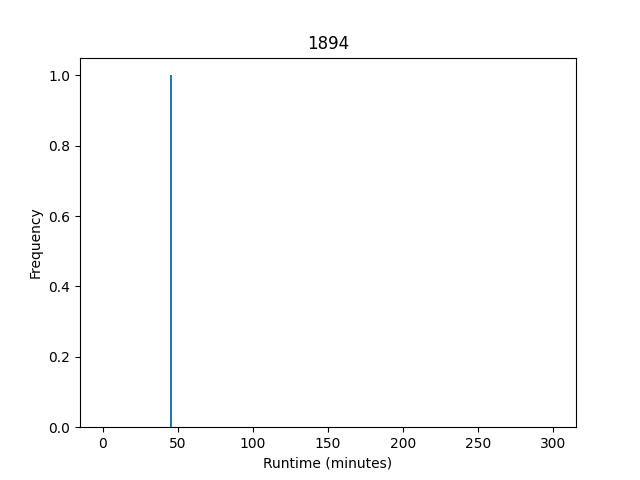

In [20]:
fig, ax3 = plt.subplots()
def make_yearwise_runtime_hist(year=1894):
    ydata = mdata.loc[mdata.startYear == year];
    ax3.clear()
    ydata.runtimeMinutes.plot.hist(ax=ax3, bins=300, range=[0,300])
    ax3.set_xlabel("Runtime (minutes)")
    ax3.set_title(year)

years = sorted(set(mdata.startYear))
widgets.interact(make_yearwise_runtime_hist, year=widgets.IntSlider(min=min(years), max=max(years), step=1, continuous_update=True));